<a href="https://colab.research.google.com/github/abhayak759/AI-ML-Projects/blob/main/GoldPrice_PredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gold Price Prediction

Abhay Kumar

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [22]:
dataset=pd.read_csv('/content/gld_price_data.csv', encoding='latin-1')

In [23]:
dataset.head()                 #prints the first five rows of the dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [24]:
#Print the last five rows of the dataset
dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [25]:
#nuumber of rows and columns
dataset.shape

(2290, 6)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [27]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [28]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [29]:
dataset['Date'] = pd.to_datetime(dataset['Date']) # convert the date column to datetime object

In [30]:
correlation=dataset.corr()

<Axes: >

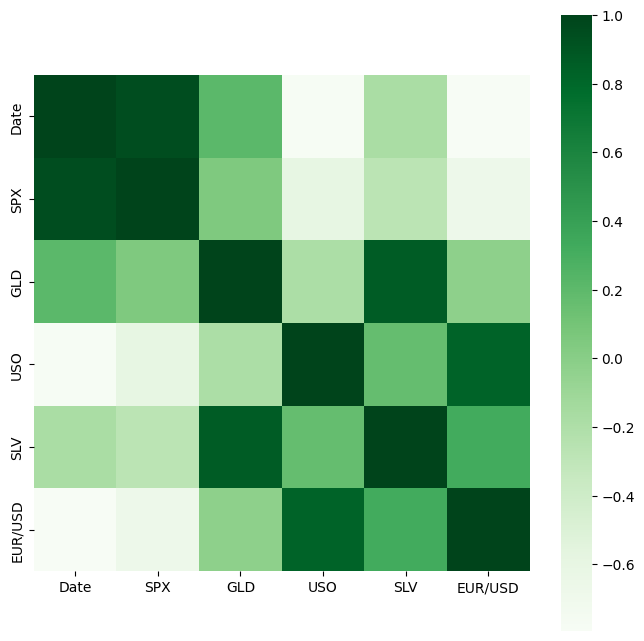

In [32]:
#constructing the heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=False, annot_kws={'size':4}, cmap='Greens')

<ipython-input-42-10b0a204cb6f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GLD'], color='blue')  #checking the distribution of the gold price


<Axes: xlabel='GLD', ylabel='Density'>

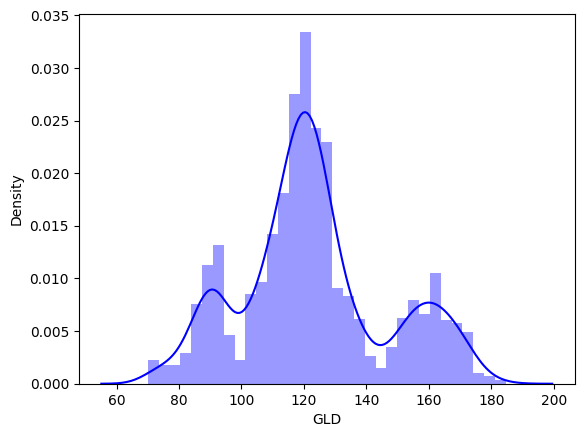

In [42]:
sns.distplot(dataset['GLD'], color='blue')  #checking the distribution of the gold price

In [34]:
X=dataset.drop(['Date','GLD'], axis=1)
y=dataset['GLD']

In [35]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [36]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [37]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=2)

In [38]:
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
#Model Evaluation, prediction on test data
y_prediction1=regressor.predict(X_test)

In [40]:
print(y_prediction1)

[168.01479938  81.96610014 116.06210045 127.7721008  120.68900142
 154.71499753 149.82069864 126.14920022 117.54729897 125.96820053
 116.58290104 172.39190076 142.02959889 167.51829862 115.10640006
 117.57790061 138.18160309 169.7021003  159.33940314 158.2053991
 155.17509956 125.19490023 176.30479991 156.86030322 125.19670029
  93.82559958  77.79599977 120.66809988 119.13619957 167.52680007
  88.05550001 125.40360032  91.1685013  117.85200002 121.05989951
 136.69230094 115.68420167 115.40050036 146.65730015 107.08910148
 104.23710247  87.13019778 126.55249998 117.76170023 153.14449878
 119.65260011 108.52109999 108.07739837  93.11430059 127.11449766
  75.09190008 113.52549933 121.4318001  111.26019926 118.84099876
 120.37869983 158.27079953 166.81320161 146.99469696  85.99239899
  94.28350032  86.77609875  90.44000019 119.01090097 126.36520069
 127.67110004 169.02360011 122.29569924 117.34069903  98.85150007
 168.56300233 142.97679876 131.7573021  121.09190224 120.9166993
 119.9179008

In [41]:
#R squared error
error_score=metrics.r2_score(y_test, y_prediction1)
print("R squared error: ", error_score)

R squared error:  0.9887554590765593
